In [11]:
import os
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# define a function to read all text files in a directory and combine them into a single string:
def read_corpus(directory):
    corpus = ""
    for filename in os.listdir(directory):
        # check for this condition, otherwise listdir takes into account binary files
        if filename.endswith(".txt"):
            with open(os.path.join(directory, filename), 'r') as f:
                text = f.read().strip(
                )  # remove preceding and following whitespaces
                corpus += text  # combine every text into one corpus
    return corpus

In [17]:
# define a function that vectorizes the string generated by the previous function


def vectorize_texts(max_features, analyzer, ngram_range, corpus_filename,
                    reverse):
    """
    Help on function vectorize_texts:

    - `max_features`: the number of features you want the matrix to have. E.g., if max_features=2000,
    then only the top 2000 most frequent features will be returned.

    - `analyzer`: {'word', 'char', 'char_wb'} or callable, default='word'
    Whether the feature should be made of word n-gram or character n-grams.
    Option 'char_wb' creates character n-grams only from text inside
    word boundaries; n-grams at the edges of words are padded with space.

    - `ngram_range`: tuple (min_n, max_n), default=(1, 1)
    The lower and upper boundary of the range of n-values for different
    word n-grams or char n-grams to be extracted. All values of n such
    such that min_n <= n <= max_n will be used. For example an
    ``ngram_range`` of ``(1, 1)`` means only unigrams, ``(1, 2)`` means
    unigrams and bigrams, and ``(2, 2)`` means only bigrams.
    Only applies if ``analyzer`` is not callable.

    - `corpus_to_vectorize`: a corpus of several texts that has been combined in a single string.
    See function read_and_combine.

    - `reverse`: {True, False}
    if set to True, it returns the features sorted in descending order.
    If False, then features are sorted in ascending order.
    """

    corpus = read_corpus(corpus_filename)

    # use CountVectorizer to transform the corpus into a matrix of charcter 4-gram counts
    # return only the first 2500 character 4grams with the highest frequency | saves some memory
    vectorizer = CountVectorizer(max_features=max_features,
                                 analyzer=analyzer,
                                 ngram_range=ngram_range)
    X = vectorizer.fit_transform([corpus])

    # convert the matrix to a list of tuples containing the n-grams and their counts
    # toarray(): returns a dense matrix instead of a sparse matrix
    ngram_counts = list(zip(vectorizer.get_feature_names_out(),
                            X.toarray()[0]))

    # sort the list in descending order of the counts:
    ngram_counts_sorted = sorted(ngram_counts,
                                 key=lambda x: x[1],
                                 reverse=reverse)

    # extract the counts and plot them as a line graph:
    counts = [count for word, count in ngram_counts_sorted]

    return counts, ngram_counts_sorted


counts, ngram_counts_sorted = vectorize_texts(
    max_features=10000,
    analyzer='char',
    ngram_range=(4, 4),
    corpus_filename='../../corpora/corpus_imposters/',
    reverse=True)

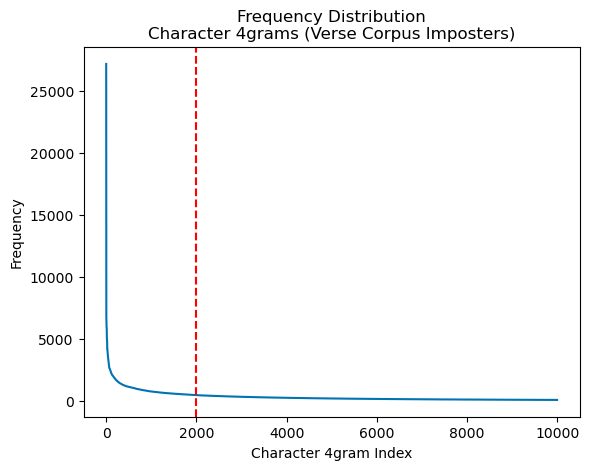

In [23]:
# plot the counts in a lineplot
sns.set_palette("colorblind")

os.makedirs('../../results/freq_dist_res/', exist_ok=True)

save_dir = '../../results/freq_dist_res/'
# plot counts into a lineplot
ax = sns.lineplot(counts)
plt.axvline(2000, color='r', linestyle='dashed', ymax=max(counts))
ax.set_title(
    "Frequency Distribution\nCharacter 4grams (Verse Corpus Imposters)")
ax.set_xlabel("Character 4gram Index")
ax.set_ylabel("Frequency")
plt.savefig(os.path.join(save_dir, 'freq_dist_char_4grams.pdf'), dpi=500)
plt.show()

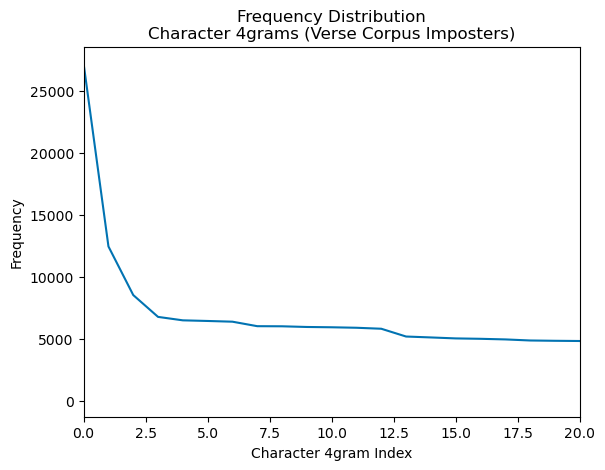

In [31]:
# zooomed in version (not to be included in the paper)

ax = sns.lineplot(counts)
plt.axvline(2000, color='r', linestyle='dashed', ymax=max(counts))
ax.set_title(
    "Frequency Distribution\nCharacter 4grams (Verse Corpus Imposters)")
ax.set_xlabel("Character 4gram Index")
ax.set_ylabel("Frequency")
ax.set_xlim(0, 20)
# plt.savefig(os.path.join(save_dir, 'freq_dist_char_4grams_zoomed.pdf'), dpi=500)
plt.show()

In [19]:
import pprint

print("Top 100 MFC 4grams along with their overall frequency:\n")
pprint.pprint(ngram_counts_sorted[:100], width=110, compact=True)

Top 100 MFC 4grams along with their overall frequency:

[('que ', 27142), (' et ', 12435), ('ere ', 8519), (' in ', 6760), ('ibus', 6483), (' qua', 6432),
 ('sque', 6374), ('bus ', 6012), ('us a', 6003), (', qu', 5948), ('mque', 5924), ('tus ', 5885),
 ('tis ', 5806), (' qui', 5179), (' pro', 5105), (' per', 5027), ('s in', 4995), ('non ', 4946),
 (' quo', 4860), (' con', 4835), (' est', 4818), ('is a', 4243), ('ris ', 4243), ('enti', 4230),
 ('tum ', 4230), ('nec ', 4179), (' non', 4116), (' par', 4064), ('aque', 3962), ('tur ', 3956),
 ('us e', 3934), (' ill', 3844), ('ente', 3795), ('is, ', 3760), ('us i', 3752), ('rum ', 3712),
 ('umqu', 3712), ('s et', 3645), ('erat', 3581), ('tque', 3579), ('ine ', 3543), ('t in', 3494),
 ('per ', 3458), (' fer', 3415), ('cum ', 3410), ('us, ', 3392), (' nec', 3277), ('quae', 3254),
 ('quam', 3208), ('iam ', 3159), ('ore ', 3137), ('mina', 3136), ('ens ', 3114), ('is i', 3104),
 ('est ', 3082), ('ius ', 3052), ('es, ', 2988), ('is e', 2951), ('ss